<a href="https://colab.research.google.com/github/ParsaJafarian/2D-inverse-kinematics/blob/main/Robotic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source: [https://github.com/ParsaJafarian/2D-inverse-kinematics/](https://github.com/ParsaJafarian/2D-inverse-kinematics/tree/main)

# Imports

In [12]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

# Arm Class


In [13]:
class Arm:
  def __init__(self,l1,l2,x,y):
      self.x = x
      self.y = y
      self.l1= l1
      self.l2= l2

  def find_angles(self):
    #Calculating Alpha(angle of the whole vector(l1+l2))
    alpha = atan2(self.y , self.x)

    #Calculating first group of angles
    teta1_1 = acos((self.x**2 + self.y**2 + self.l1**2 - self.l2**2)/ (2*self.l1*sqrt(self.x**2+self.y**2))) + alpha
    teta2_1 = atan2((self.y-self.l1*sin(teta1_1))/self.l2,(self.x-self.l1*cos(teta1_1))/self.l2) - teta1_1

    angles_1 = [teta1_1,teta2_1]
    angles_1 = tuple(angles_1)

    #Calculating second group of angles
    teta1_2 = -acos((self.x**2 + self.y**2 + self.l1**2 - self.l2**2)/ (2*self.l1*sqrt(self.x**2+self.y**2))) + alpha
    teta2_2 = atan2((self.y-self.l1*sin(teta1_2))/self.l2,(self.x-self.l1*cos(teta1_2))/self.l2) - teta1_2

    angles_2 = [teta1_2,teta2_2]
    angles_2 = tuple(angles_2)

    angles = [angles_1,angles_2]
    return angles

# Functions

## Show Graph

In [14]:
def show_graph(l1, l2, teta1_1, teta2_1, teta1_2, teta2_2):
  z = [-(l1 + l2), (l1 + l2)]
  plt.figure(figsize=(7, 7))  # Taille du graphique
  plt.xlim(z)  # 1 Plage X [-6,6]
  plt.ylim(z)  # 2 Plage Y [-6,6]
  axis = plt.gca()  # 3 Obtenir l'axe actuel
  plt.plot(axis.get_xlim(), [0, 0], 'k--')  # 4 Ligne horizontale
  plt.plot([0, 0], axis.get_ylim(), 'k--')  # 5 Ligne verticale

  # Premier chemin (Rouge)
  xe_1 = l1 * cos(teta1_1) + l2 * cos(teta1_1 + teta2_1)
  ye_1 = l1 * sin(teta1_1) + l2 * sin(teta1_1 + teta2_1)

  plt.plot([0, l1 * cos(teta1_1)], [0, l1 * sin(teta1_1)], color='red')
  plt.plot([l1 * cos(teta1_1), xe_1], [l1 * sin(teta1_1), ye_1], color='red')

  # Ajouter les annotations pour les angles du premier chemin
  plt.text(l1 * cos(teta1_1) / 2, l1 * sin(teta1_1) / 2, f"{round(teta1_1, 2)} rad", color='red')
  plt.text((l1 * cos(teta1_1) + xe_1) / 2, (l1 * sin(teta1_1) + ye_1) / 2, f"{round(teta2_1, 2)} rad", color='red')

  # Deuxième chemin (Bleu)
  xe_2 = l1 * cos(teta1_2) + l2 * cos(teta1_2 + teta2_2)
  ye_2 = l1 * sin(teta1_2) + l2 * sin(teta1_2 + teta2_2)

  plt.plot([0, l1 * cos(teta1_2)], [0, l1 * sin(teta1_2)], color='blue')
  plt.plot([l1 * cos(teta1_2), xe_2], [l1 * sin(teta1_2), ye_2], color='blue')

  # Ajouter les annotations pour les angles du deuxième chemin
  plt.text(l1 * cos(teta1_2) / 2, l1 * sin(teta1_2) / 2, f"{round(teta1_2, 2)} rad", color='blue')
  plt.text((l1 * cos(teta1_2) + xe_2) / 2, (l1 * sin(teta1_2) + ye_2) / 2, f"{round(teta2_2, 2)} rad", color='blue')

  # Cercles de portée
  circle1 = plt.Circle((0, 0), (l1 + l2), facecolor='none', edgecolor='black')
  circle2 = plt.Circle((0, 0), (l1 - l2), facecolor='none', edgecolor='black')
  plt.gca().add_patch(circle1)
  plt.gca().add_patch(circle2)

  plt.ylabel('x')
  plt.xlabel('y')
  plt.title("Manipulateurs")
  plt.grid()
  plt.show()

## Show Animation

In [15]:
def show_animation(l1,l2,teta1_1,teta2_1,teta1_2,teta2_2):
  z = [-(l1+l2),(l1+l2)]
  fig = plt.figure(figsize=(7,7))
  plt.xlim(z) # 1 X Range [-6,6]
  plt.ylim(z) # 2 Y Range [-6,6]
  axis = plt.gca() #3 Get Current Axis
  plt.plot(axis.get_xlim(),[0,0],'k--') #4 X Axis Plots Line Across
  plt.plot([0,0],axis.get_ylim(),'k--') #5 Y Axis Plots Line Across

  plt.ylabel('x')
  plt.xlabel('y')
  plt.title("Manipulators")
  plt.grid()

  circle1 = plt.Circle((0, 0), (l1+l2),facecolor= 'none',edgecolor= 'black' )
  circle2 = plt.Circle((0, 0), (l1-l2),facecolor= 'none',edgecolor = 'black' )
  plt.gca().add_patch(circle1)
  plt.gca().add_patch(circle2)

  L1_1, = plt.plot([], [],'b' )
  L2_1, = plt.plot([], [],'b' )
  L1_2, = plt.plot([], [],'r' )
  L2_2, = plt.plot([], [],'r' )

  xdata, ydata = [], []
  xdata2,ydata2= [], []
  ln, = plt.plot([], [],'b' )
  ln2, = plt.plot([], [],'r' )

  def animate(frame):
    #First Path

    #L1
    x = l1*cos(teta1_1*frame/100)
    y = l1*sin(teta1_1*frame/100)
    L1_1.set_data([(0, x), (0, y)])

    #L2
    xe = l1*cos(teta1_1*frame/100) + l2*cos((teta1_1+teta2_1)*frame/100)
    ye = l1*sin(teta1_1*frame/100) + l2*sin((teta1_1+teta2_1)*frame/100)
    L2_1.set_data([(x, xe), (y, ye)])

    #Second Path

    #L1
    x = l1*cos(teta1_2*frame/100)
    y = l1*sin(teta1_2*frame/100)
    L1_2.set_data([(0, x), (0, y)])

    #L2
    xe = l1*cos(teta1_2*frame/100) + l2*cos((teta1_2+teta2_2)*frame/100)
    ye = l1*sin(teta1_2*frame/100) + l2*sin((teta1_2+teta2_2)*frame/100)
    L2_2.set_data([(x, xe), (y, ye)])

    #Endpoint Path
    xe = l1*cos(teta1_1*frame/100) + l2*cos((teta1_1+teta2_1)*frame/100)
    ye = l1*sin(teta1_1*frame/100) + l2*sin((teta1_1+teta2_1)*frame/100)
    xdata.append(xe)
    ydata.append(ye)
    ln.set_data(xdata,ydata)

    #Second Endpoint Path
    xe2 = l1*cos(teta1_2*frame/100) + l2*cos((teta1_2+teta2_2)*frame/100)
    ye2 = l1*sin(teta1_2*frame/100) + l2*sin((teta1_2+teta2_2)*frame/100)
    xdata2.append(xe2)
    ydata2.append(ye2)
    ln2.set_data(xdata2,ydata2)

    return L1_1,L2_1,L2_1,L2_2

  anim = FuncAnimation(fig, animate, frames=100, interval = 40)
  video = anim.to_html5_video()
  html = display.HTML(video)
  display.display(html)
  plt.close()

## Draw Circle

In [16]:
def draw_circle(l1,l2,h=0,k=0,r=1):
  z = [-(l1+l2),(l1+l2)]
  fig = plt.figure(figsize=(7,7))
  plt.xlim(z) # 1 X Range [-6,6]
  plt.ylim(z) # 2 Y Range [-6,6]
  axis = plt.gca() #3 Get Current Axis
  plt.plot(axis.get_xlim(),[0,0],'k--') #4 X Axis Plots Line Across
  plt.plot([0,0],axis.get_ylim(),'k--') #5 Y Axis Plots Line Across

  plt.ylabel('x')
  plt.xlabel('y')
  plt.title("Manipulators")
  plt.grid()

  circle1 = plt.Circle((0, 0), (l1+l2),facecolor= 'none',edgecolor= 'black' )
  circle2 = plt.Circle((0, 0), (l1-l2),facecolor= 'none',edgecolor = 'black' )
  plt.gca().add_patch(circle1)
  plt.gca().add_patch(circle2)

  L1_1, = plt.plot([], [],'b' )
  L2_1, = plt.plot([], [],'b' )
  L1_2, = plt.plot([], [],'r' )
  L2_2, = plt.plot([], [],'r' )

  xdata, ydata = [], []
  xdata2,ydata2= [], []
  ln, = plt.plot([], [],'purple' )

  def animate(frame):
    clockwise = False
    x = r*cos(2*pi*frame/100)+h
    y = r*sin(2*pi*frame/100)+k

    my_arm = Arm(l1,l2,x,y)
    f = my_arm.find_angles()

    teta1_1=f[0][0]
    teta2_1=f[0][1]
    teta1_2=f[1][0]
    teta2_2=f[1][1]

    #L1
    x = l1*cos(teta1_1)
    y = l1*sin(teta1_1)
    L1_1.set_data([(0, x), (0, y)])

    #L2
    xe = l1*cos(teta1_1) + l2*cos(teta1_1+teta2_1)
    ye = l1*sin(teta1_1) + l2*sin((teta1_1+teta2_1))
    L2_1.set_data([(x, xe), (y, ye)])

    #Second Path

    #L1
    x = l1*cos(teta1_2)
    y = l1*sin(teta1_2)
    L1_2.set_data([(0, x), (0, y)])

    #L2
    xe = l1*cos(teta1_2) + l2*cos(teta1_2+teta2_2)
    ye = l1*sin(teta1_2) + l2*sin(teta1_2+teta2_2)
    L2_2.set_data([(x, xe), (y, ye)])

    #Endpoint Path
    xe = l1*cos(teta1_1) + l2*cos(teta1_1+teta2_1)
    ye = l1*sin(teta1_1) + l2*sin(teta1_1+teta2_1)
    xdata.append(xe)
    ydata.append(ye)
    ln.set_data(xdata,ydata)

    return L1_1,L2_1,L2_1,L2_2


  anim = FuncAnimation(fig, animate, frames=100, interval = 40)
  video = anim.to_html5_video()
  html = display.HTML(video)
  display.display(html)
  plt.close()

## Draw Line


In [17]:
def draw_line(l1,l2,x1,y1,x2,y2):
  z = [-(l1+l2),(l1+l2)]
  fig = plt.figure(figsize=(7,7))
  plt.xlim(z) # 1 X Range [-6,6]
  plt.ylim(z) # 2 Y Range [-6,6]
  axis = plt.gca() #3 Get Current Axis
  plt.plot(axis.get_xlim(),[0,0],'k--') #4 X Axis Plots Line Across
  plt.plot([0,0],axis.get_ylim(),'k--') #5 Y Axis Plots Line Across

  plt.ylabel('x')
  plt.xlabel('y')
  plt.title("Manipulators")
  plt.grid()

  circle1 = plt.Circle((0, 0), (l1+l2),facecolor= 'none',edgecolor= 'black' )
  circle2 = plt.Circle((0, 0), (l1-l2),facecolor= 'none',edgecolor = 'black' )
  plt.gca().add_patch(circle1)
  plt.gca().add_patch(circle2)

  L1_1, = plt.plot([], [],'b' )
  L2_1, = plt.plot([], [],'b' )
  L1_2, = plt.plot([], [],'r' )
  L2_2, = plt.plot([], [],'r' )

  xdata, ydata = [], []
  xdata2,ydata2= [], []
  ln, = plt.plot([], [],'purple' )

  def animate(frame):
    x = x1+(x2-x1)*frame/100
    y = y1+(y2-y1)*frame/100

    my_arm = Arm(l1,l2,x,y)
    f = my_arm.find_angles()

    teta1_1=f[0][0]
    teta2_1=f[0][1]
    teta1_2=f[1][0]
    teta2_2=f[1][1]

    #L1
    x = l1*cos(teta1_1)
    y = l1*sin(teta1_1)
    L1_1.set_data([(0, x), (0, y)])

    #L2
    xe = l1*cos(teta1_1) + l2*cos(teta1_1+teta2_1)
    ye = l1*sin(teta1_1) + l2*sin((teta1_1+teta2_1))
    L2_1.set_data([(x, xe), (y, ye)])

    #Second Path

    #L1
    x = l1*cos(teta1_2)
    y = l1*sin(teta1_2)
    L1_2.set_data([(0, x), (0, y)])

    #L2
    xe = l1*cos(teta1_2) + l2*cos(teta1_2+teta2_2)
    ye = l1*sin(teta1_2) + l2*sin(teta1_2+teta2_2)
    L2_2.set_data([(x, xe), (y, ye)])

    #Endpoint Path
    xe = l1*cos(teta1_1) + l2*cos(teta1_1+teta2_1)
    ye = l1*sin(teta1_1) + l2*sin(teta1_1+teta2_1)
    xdata.append(xe)
    ydata.append(ye)
    ln.set_data(xdata,ydata)

    return L1_1,L2_1,L2_1,L2_2

  anim = FuncAnimation(fig, animate, frames=100, interval = 40)
  video = anim.to_html5_video()
  html = display.HTML(video)
  display.display(html)
  plt.close()

# Outputs

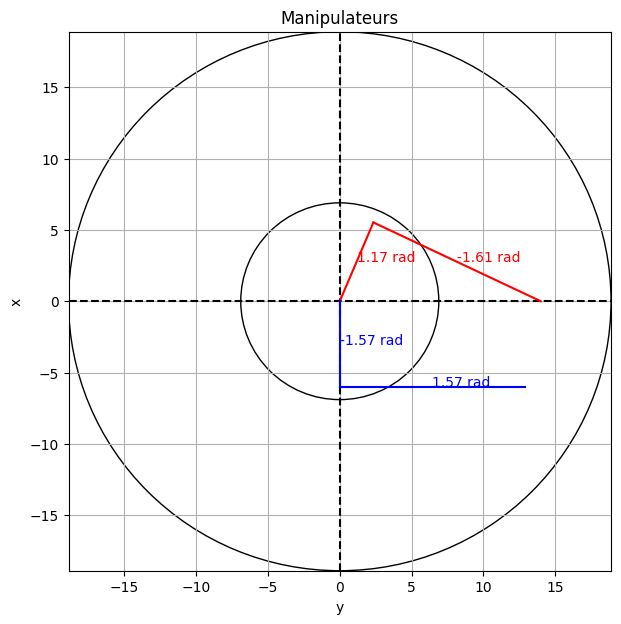

In [47]:
l1 = 6
l2 = 12.9
x=14
y=0

def deg_to_rad(deg):
  return deg * (pi / 180)

my_arm = Arm(l1,l2,x,y)
try:
  f = my_arm.find_angles()
except:
  print('Coordinates are not in range')
else:
  teta1_1=f[0][0]
  teta2_1=f[0][1]
  teta1_2=f[1][0]
  teta2_2=f[1][1]

  show_graph(l1,l2,teta1_1,teta2_1,deg_to_rad(-90),deg_to_rad(90))

In [19]:
l1 = 3
l2 = 2
x=-1
y=2

my_arm = Arm(l1,l2,x,y)
try:
  f = my_arm.find_angles()
except:
  print('Coordinates are not in range')
else:
  teta1_1=f[0][0]
  teta2_1=f[0][1]
  teta1_2=f[1][0]
  teta2_2=f[1][1]

  show_animation(l1,l2,teta1_1,teta2_1,teta1_2,teta2_2)

In [20]:
l1 = 3
l2 = 2
h= 2
k=-2
r=1.8

draw_circle(l1,l2,h,k,r)


The coordinates are not in range


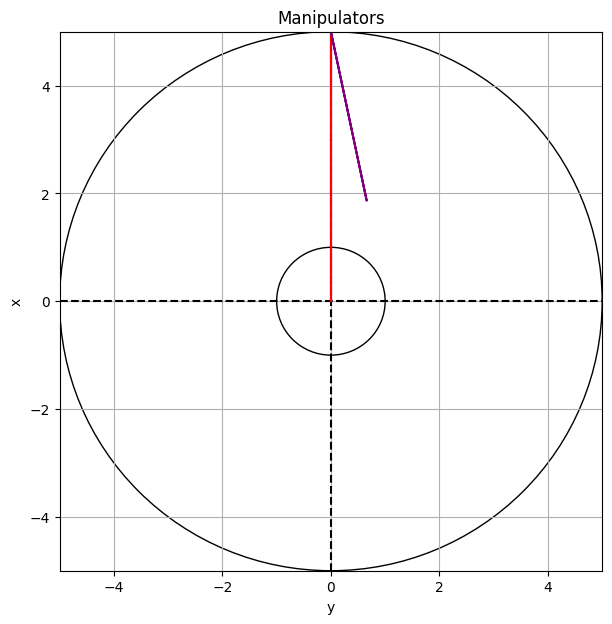

In [21]:
l1 = 3
l2 = 2
x1 = 0
y1 = 5
x2 = 2
y2 = -4.5
try:
  draw_line(l1,l2,x1,y1,x2,y2)
except:
  print('The coordinates are not in range')